In [1]:

import json
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
import warnings

warnings.simplefilter('ignore')

sys.path.append('../utilities')
sys.path.append('../models/grt123')
sys.path.append('../models/grt123/training')
sys.path.append('../models/grt123/preprocessing/')

# from layers import nms,iou
from summit_utils import *
from evaluation import noduleCADEvaluation

workspace_path = os.path.join(os.getcwd(), '..')


LUNA_SERIES_PATH = Path(f'{workspace_path}/data/LUNA/metadata/seriesuids.csv')
LUNA_POSITIVE_ONLY_SERIES_PATH = Path(f'{workspace_path}/data/LUNA/metadata/positive_only_seriesuids.csv')

LUNA_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations.csv')
LUNA_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations_gt4.csv')

LUNA_EXCLUSIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/annotations_excluded.csv')
LUNA_EXCLUSIONS_PATH_EMPTY = Path(f'{workspace_path}/data/LUNA/metadata/annotations_excluded_empty.csv')

LUNA_GRT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations.csv')
LUNA_GRT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_gt4.csv')

LUNA_GRT_EXCLUSIONS_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded.csv')
LUNA_GRT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')

SUMMIT_SERIES_PATH = Path(f'{workspace_path}/data/summit/metadata/seriesuids.csv')

SUMMIT_GRT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/grt123_annotations.csv')
SUMMIT_GRT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/grt123_annotations_gt4.csv')

SUMMIT_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/annotations.csv')
SUMMIT_GT4_ANNOTATIONS_PATH = Path(f'{workspace_path}/data/summit/metadata/annotations_gt4.csv')

SUMMIT_GRT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')
SUMMIT_EXCLUSIONS_EMPTY_PATH = Path(f'{workspace_path}/data/LUNA/metadata/grt123_annotations_excluded_empty.csv')

def caluclate_cpm_from_bootstrapping(file_path):
    metrics = pd.read_csv(file_path)

    fps = metrics['FPrate']
    mean_sens = metrics['Sensivity[Mean]']
    low_mean_sens = metrics['Sensivity[Lower bound]']
    high_mean_sens = metrics['Sensivity[Upper bound]']

    idxs = []
    for fps_value in [0.125, 0.25, 0.5, 1, 2, 4, 8]:
        idxs.append(np.abs(fps - fps_value).argmin())
        
        

    fps = fps[idxs]
    mean_sens = mean_sens[idxs]
    low_sens = low_mean_sens[idxs]
    high_sens = high_mean_sens[idxs]

    
    df = pd.DataFrame({'fps': fps, 'mean_sens': mean_sens, 'low_sens': low_sens, 'high_sens': high_sens}).apply(lambda x: np.round(x,2))
    mean_cpm = df['mean_sens'].mean()
    low_cpm = df['low_sens'].mean()
    high_cpm = df['high_sens'].mean()

    display(df)
    print('Mean Sensitivity:', np.round(mean_cpm,2), 'Low Sensitivity:', np.round(low_cpm,2), 'High Sensitivity:', np.round(high_cpm,2))

def show_metrics(file_path):
    metrics = pd.read_csv(file_path, skiprows=6, sep=':').rename(columns={0:'Metric',1:'Value'}).round(2)
    display(metrics)

# GRT 123 - Trained LUNA Evaluated on LUNA

## Arm 1: Balanced combination of Positive and Negative samples

- Trained using all LUNA scans
- Annotations must be in the GRT123 form

### With exclusions

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/LUNA/metadata/grt123_annotations.csv
Total number of included nodule annotations: 1186
Total number of nodule annotations: 36378
Cases: 888


100%|██████████| 1000/1000 [00:19<00:00, 50.81it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.69,0.65,0.73
159,0.25,0.78,0.75,0.81
476,0.50,0.84,0.81,0.86
1111,1.00,0.88,0.86,0.90
2381,2.00,0.91,0.89,0.93
4920,4.00,0.93,0.91,0.94
9999,8.00,0.94,0.93,0.96


Mean Sensitivity: 0.85 Low Sensitivity: 0.83 High Sensitivity: 0.88


,True positives,1126
0,False positives,12530.00
1,False negatives,60.00
2,True negatives,0.00
3,Total number of candidates,17273.00
4,Total number of nodules,1186.00
5,Ignored candidates on excluded nodules,3608.00
6,Ignored candidates which were double detec...,9.00
7,Sensitivity,0.95
8,Average number of candidates per scan,19.45


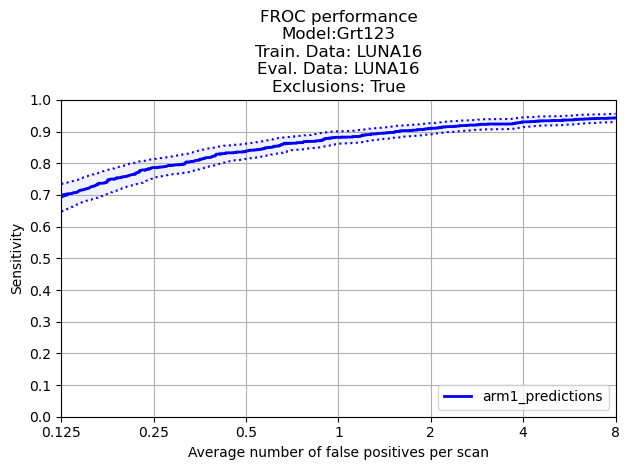

In [4]:
_ = noduleCADEvaluation(
    annotations_filename=LUNA_GRT_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_GRT_EXCLUSIONS_PATH,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/luna/arm1/arm1_predictions.csv",    
    filter='\nModel:Grt123\nTrain. Data: LUNA16\nEval. Data: LUNA16\nExclusions: True',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/luna/arm1_with_exclusions',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/luna/arm1_with_exclusions/froc_arm1_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/luna/arm1_with_exclusions/CADAnalysis.txt')

### Without exclusions

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/LUNA/metadata/grt123_annotations.csv
Total number of included nodule annotations: 1186
Total number of nodule annotations: 1186
Cases: 888


100%|██████████| 1000/1000 [00:24<00:00, 40.31it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.44,0.40,0.48
159,0.25,0.55,0.50,0.59
476,0.50,0.68,0.65,0.72
1111,1.00,0.79,0.76,0.82
2381,2.00,0.86,0.84,0.88
4920,4.00,0.91,0.89,0.93
9999,8.00,0.94,0.92,0.95


Mean Sensitivity: 0.74 Low Sensitivity: 0.71 High Sensitivity: 0.77


,True positives,1126
0,False positives,16138.00
1,False negatives,60.00
2,True negatives,0.00
3,Total number of candidates,17273.00
4,Total number of nodules,1186.00
5,Ignored candidates on excluded nodules,0.00
6,Ignored candidates which were double detec...,9.00
7,Sensitivity,0.95
8,Average number of candidates per scan,19.45


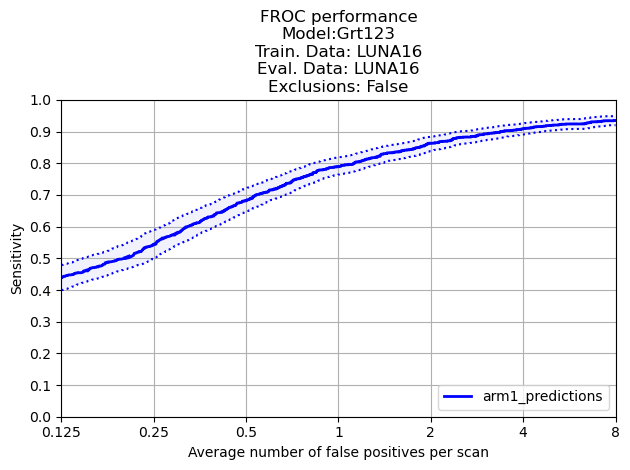

In [5]:
_ = noduleCADEvaluation(
    annotations_filename=LUNA_GRT_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_GRT_EXCLUSIONS_EMPTY_PATH,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/luna/arm1/arm1_predictions.csv",    
    filter='\nModel:Grt123\nTrain. Data: LUNA16\nEval. Data: LUNA16\nExclusions: False',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/luna/arm1_without_exclusions',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/luna/arm1_without_exclusions/froc_arm1_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/luna/arm1_without_exclusions/CADAnalysis.txt')

## Arm 2: Trained with just Positive samples

### With exclusions

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/LUNA/metadata/grt123_annotations.csv
Total number of included nodule annotations: 1186
Total number of nodule annotations: 36378
Cases: 888


100%|██████████| 1000/1000 [00:35<00:00, 27.97it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.64,0.60,0.68
159,0.25,0.74,0.70,0.77
476,0.50,0.80,0.77,0.83
1111,1.00,0.84,0.82,0.86
2381,2.00,0.87,0.85,0.89
4920,4.00,0.89,0.88,0.91
9999,8.00,0.91,0.89,0.92


Mean Sensitivity: 0.81 Low Sensitivity: 0.79 High Sensitivity: 0.84


,True positives,1102
0,False positives,26030.00
1,False negatives,84.00
2,True negatives,0.00
3,Total number of candidates,31150.00
4,Total number of nodules,1186.00
5,Ignored candidates on excluded nodules,4006.00
6,Ignored candidates which were double detec...,12.00
7,Sensitivity,0.93
8,Average number of candidates per scan,35.08


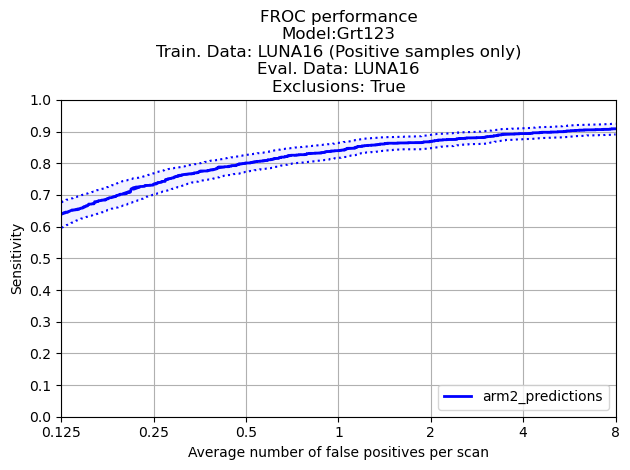

In [6]:
_ = noduleCADEvaluation(
    annotations_filename=LUNA_GRT_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_GRT_EXCLUSIONS_PATH,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/luna/arm2/arm2_predictions.csv",    
    filter='\nModel:Grt123\nTrain. Data: LUNA16 (Positive samples only)\nEval. Data: LUNA16\nExclusions: True',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/luna/arm2_with_exclusions',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/luna/arm2_with_exclusions/froc_arm2_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/luna/arm2_with_exclusions/CADAnalysis.txt')

### Without Exclusions

/Users/john/Projects/SOTAEvaluationNoduleDetection/notebooks/../data/LUNA/metadata/grt123_annotations.csv
Total number of included nodule annotations: 1186
Total number of nodule annotations: 1186
Cases: 888


100%|██████████| 1000/1000 [00:42<00:00, 23.55it/s]


,fps,mean_sens,low_sens,high_sens
0,0.12,0.36,0.31,0.42
159,0.25,0.54,0.49,0.59
476,0.50,0.66,0.62,0.69
1111,1.00,0.77,0.74,0.80
2381,2.00,0.83,0.80,0.86
4920,4.00,0.87,0.85,0.89
9999,8.00,0.90,0.88,0.92


Mean Sensitivity: 0.7 Low Sensitivity: 0.67 High Sensitivity: 0.74


,True positives,1102
0,False positives,30036.00
1,False negatives,84.00
2,True negatives,0.00
3,Total number of candidates,31150.00
4,Total number of nodules,1186.00
5,Ignored candidates on excluded nodules,0.00
6,Ignored candidates which were double detec...,12.00
7,Sensitivity,0.93
8,Average number of candidates per scan,35.08


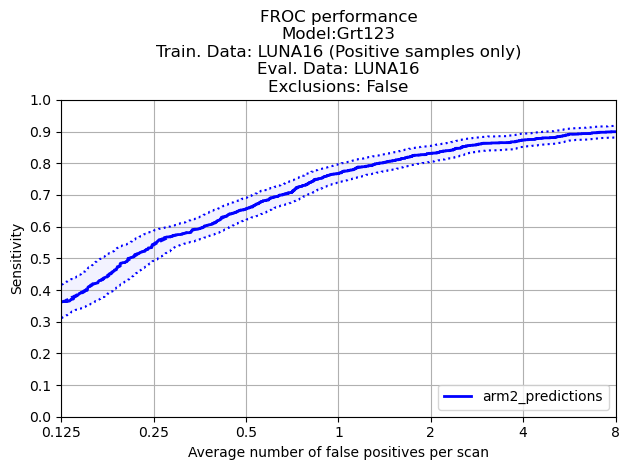

In [7]:
_ = noduleCADEvaluation(
    annotations_filename=LUNA_GRT_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_GRT_EXCLUSIONS_EMPTY_PATH,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=f"{workspace_path}/models/grt123/bbox_result/trained_luna/luna/arm2/arm2_predictions.csv",    
    filter='\nModel:Grt123\nTrain. Data: LUNA16 (Positive samples only)\nEval. Data: LUNA16\nExclusions: False',
    outputDir=f'{workspace_path}/results/grt123/trained_luna/luna/arm2_without_exclusions',
)
caluclate_cpm_from_bootstrapping(f'{workspace_path}/results/grt123/trained_luna/luna/arm2_without_exclusions/froc_arm2_predictions_bootstrapping.csv')
show_metrics(f'{workspace_path}/results/grt123/trained_luna/luna/arm2_without_exclusions/CADAnalysis.txt')

# Detection - Trained LUNA Evaluated LUNA

In [ ]:
def combine_predictions(predictions_json_path, dataset_name, use_nms=True):
    """
    Get predictions from a json file

    Args:
    predictions_json_path: str, path to the json file

    Returns:
    images: list of str, list of image names
    predictions: pd.DataFrame, dataframe of predictions
    
    """
    predictions_json_path = Path(predictions_json_path)

    predictions_list = []

    for prediction_json_path in predictions_json_path.glob('*json'):
        
        print(prediction_json_path)

        with open(prediction_json_path,'r') as f:
            predictions_json = json.load(f)

        idx = 0
        for image_cnt, image in enumerate(predictions_json[dataset_name]):
            name = image['image'].split('/')[-1][:-7]
            
            image_predictions_dict = {}
            for box, score in zip(image['box'], image['score']):
                prediction = {}
                prediction['threshold'] = score
                prediction['index'] = box[2]
                prediction['col'] = box[1]
                prediction['row'] = box[0]
                prediction['diameter'] = np.max(box[3:])
                prediction['name'] = name

                image_predictions_dict[idx] = prediction
                idx+=1
            
            image_predictions = pd.DataFrame.from_dict(image_predictions_dict, orient='index')
            predictions_list.append(image_predictions)

    predictions = pd.concat(predictions_list, ignore_index=True)
    predictions.to_csv(predictions_json_path / 'predictions.csv', index=False)

    return predictions_json_path / 'predictions.csv'


## Arm 1: Balanced combination of Positive and Negative samples

### With exclusions

In [ ]:
predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/luna/arm1","test")

_ = noduleCADEvaluation(
    annotations_filename=LUNA_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel:Detection\nTrain. Data: LUNA16\nEval. Data: LUNA16\nExclusions: True',
    outputDir=f"{workspace_path}/results/detection/trained_luna/luna/arm1_with_exclusions"
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/luna/arm1_with_exclusions/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/luna/arm1_with_exclusions/CADAnalysis.txt")

### Without exclusions

In [ ]:
predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/luna/arm1","test")

_ = noduleCADEvaluation(
    annotations_filename=LUNA_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH_EMPTY,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel:Detection\nTrain. Data: LUNA16\nEval. Data: LUNA16\nExclusions: False',
    outputDir=f"{workspace_path}/results/detection/trained_luna/luna/arm1_without_exclusions"
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/luna/arm1_without_exclusions/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/luna/arm1_without_exclusions/CADAnalysis.txt")

## Arm 2: Trained with just Positive samples

### With exclusions

In [ ]:
predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/luna/arm2","test")

_ = noduleCADEvaluation(
    annotations_filename=LUNA_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel:Detection\nTrain. Data: LUNA16 (Positive samples only)\nEval. Data: LUNA16\nExclusions: True',
    outputDir=f"{workspace_path}/results/detection/trained_luna/luna/arm2_with_exclusions"
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/luna/arm2_with_exclusions/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/luna/arm2_with_exclusions/CADAnalysis.txt")

### Without exclusions

In [ ]:
predictions_filepath = combine_predictions(f"{workspace_path}/models/detection/result/trained_luna/luna/arm2","test")

detection_luna_on_luna_arm2 = noduleCADEvaluation(
    annotations_filename=LUNA_ANNOTATIONS_PATH,
    annotations_excluded_filename=LUNA_EXCLUSIONS_PATH_EMPTY,
    seriesuids_filename=LUNA_SERIES_PATH,
    results_filename=predictions_filepath,    
    filter='\nModel:Detection\nTrain. Data: LUNA16 (Positive samples only)\nEval. Data: LUNA16\nExclusions: False',
    outputDir=f"{workspace_path}/results/detection/trained_luna/luna/arm2_without_exclusions"
)
caluclate_cpm_from_bootstrapping(f"{workspace_path}/results/detection/trained_luna/luna/arm2_without_exclusions/froc_predictions_bootstrapping.csv")
show_metrics(f"{workspace_path}/results/detection/trained_luna/luna/arm2_without_exclusions/CADAnalysis.txt")